In [170]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [171]:
def read_df():
    """
    
    """
    
    df = pd.read_csv(os.path.join('..','data','raw','dataset_SCL.csv'),
        parse_dates=['Fecha-I','Fecha-O'])

    
    # NaN check in data frame
    if df.isnull().any().any():

        print('There is/are NaN in these Rows\n',df.isnull().any())

    return df


In [172]:
df = read_df()
df.head()

C:\Users\alan.matys\AppData\Local\Temp\ipykernel_87596\1608674298.py:6: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join('..','data','raw','dataset_SCL.csv'),


There is/are NaN in these Rows
 Fecha-I      False
Vlo-I        False
Ori-I        False
Des-I        False
Emp-I        False
Fecha-O      False
Vlo-O         True
Ori-O        False
Des-O        False
Emp-O        False
DIA          False
MES          False
AÑO          False
DIANOM       False
TIPOVUELO    False
OPERA        False
SIGLAORI     False
SIGLADES     False
dtype: bool


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [213]:
def synthetic_features(df):
    """
    
    """

    new_cols = ['high_season','min_diff','delay_15']

    condition = (
                (df['Fecha-I'].between('2016-12-15','2017-03-03')) 
                | (df['Fecha-I'].between('2017-09-11','2017-09-30')) 
                | (df['Fecha-I'].between('2017-07-15','2017-07-31'))
    )

    df[new_cols[0]] = np.where(condition, 
                               1,
                               0)

    df[new_cols[1]] = (df['Fecha-O'] - df['Fecha-I']).dt.total_seconds() / 60.0

    df[new_cols[2]] = np.where(df['min_diff'] > 15,
                              1,
                              0)

    return df

In [214]:
df = synthetic_features(df)
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,min_diff,delay_15,high_season
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,1,2017,Domingo,I,American Airlines,Santiago,Miami,3.0,0,1
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,1,2017,Lunes,I,American Airlines,Santiago,Miami,9.0,0,1
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,1,2017,Martes,I,American Airlines,Santiago,Miami,9.0,0,1
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,1,2017,Miercoles,I,American Airlines,Santiago,Miami,3.0,0,1
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,1,2017,Jueves,I,American Airlines,Santiago,Miami,-2.0,0,1


## EDA (Exploratory Data Analysis)

In this section we try to describe the categorical and the numerical variables

### Categorical Variables

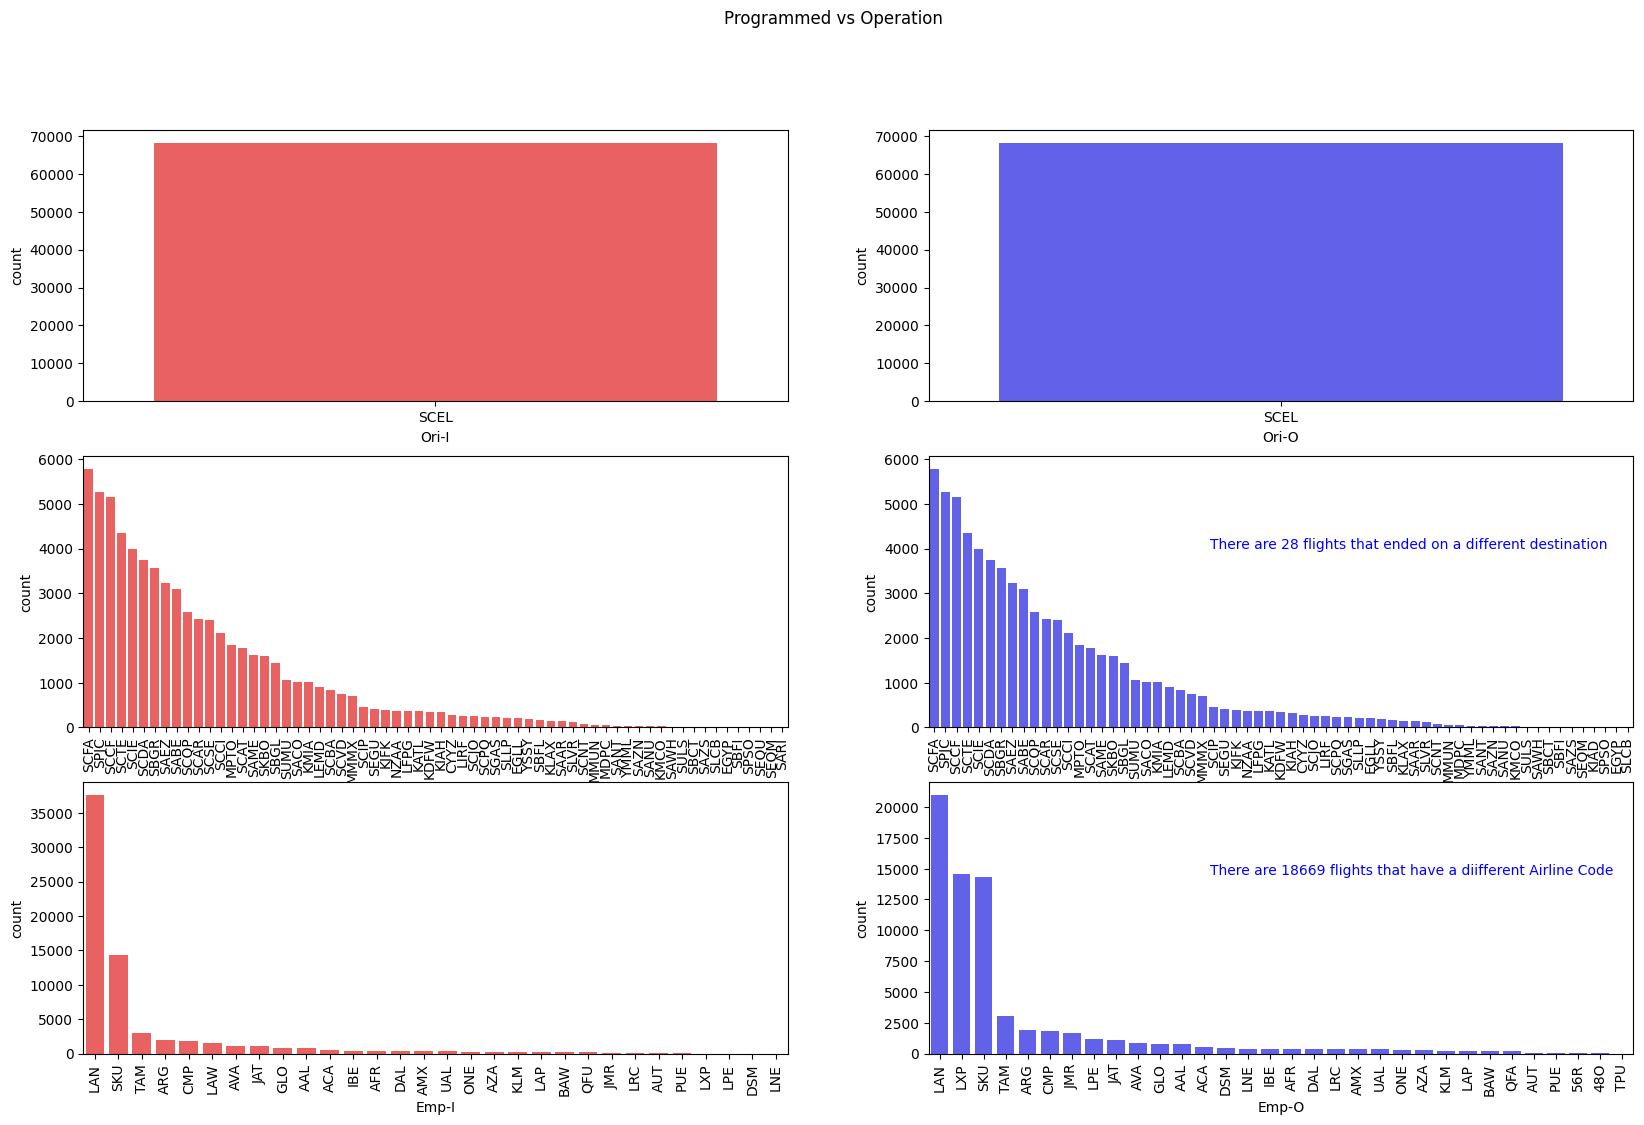

In [108]:
fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(20,12))

fig.suptitle('Programmed vs Operation')

sns.countplot(x=df["Ori-I"],
              order = df['Ori-I'].value_counts().index,
              ax=axes[0,0],
              color='red',
              alpha=0.7)

sns.countplot(x=df["Ori-O"],
              order = df['Ori-O'].value_counts().index,
              ax=axes[0,1],
              color='blue',
              alpha=0.7)

sns.countplot(x=df["Des-I"],
              order = df['Des-I'].value_counts().index,
              ax=axes[1,0],
              color='red',
              alpha=0.7)
axes[1,0].tick_params(axis='x', rotation=90)

sns.countplot(x=df["Des-O"],
              order = df['Des-O'].value_counts().index,
              ax=axes[1,1],
              color='blue',
              alpha=0.7)
axes[1,1].tick_params(axis='x', rotation=90)

dis_des = len(df[df['Des-I'] != df['Des-O']])

axes[1,1].text(.4, .70,
                f'There are {dis_des} flights that ended on a different destination',
                 ha='left',
                 va='top',
                 color='blue',
                 transform=axes[1,1].transAxes)

sns.countplot(x=df["Emp-I"],
              order = df['Emp-I'].value_counts().index,
              ax=axes[2,0],
              color='red',
              alpha=0.7)
axes[2,0].tick_params(axis='x', rotation=90)

sns.countplot(x=df["Emp-O"],
              order = df['Emp-O'].value_counts().index,
              ax=axes[2,1],
              color='blue',
              alpha=0.7)
axes[2,1].tick_params(axis='x', rotation=90)

dis_emp = len(df[df['Emp-I'] != df['Emp-O']])

axes[2,1].text(.4, .70,
                f'There are {dis_emp} flights that have a diifferent Airline Code',
                 ha='left',
                 va='top',
                 color='blue',
                 transform=axes[2,1].transAxes)

plt.show()